In [ ]:
i=7

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/mgander/Atlantic/notebooks/Kinobeads")
import fitter
from fitter import process_dfs
cols = ['-pec50', 'slope', 'front', 'back', 'fold_change', 'auc', 'rmse', 'r2', 'M1_noise', 'p_err_0', 'p_err_1', 'p_err_2', 'p_err_3', 
     'p_err_4', 'm0_rmse', 'm1_likelihood', 'm0_likelihood', 'f_statistic', 'p_value']

Path='/home/mgander/Atlantic/data/Viability/'

M = pd.read_pickle(f'{Path}/M_all_all.pkl')
sources = sorted(set(M['Source']))

df = M[M['Source']==sources[i]].copy()

df['log_dose']=np.log10(df['Dose'])

df['key'] = df['Cello']+'_'+df['PubChem_CID']
df['key'] = df['key'].astype('category')

keys=sorted(set(df['key']))

def do_batch(batch):
    dfb = df[df['key'].isin(batch)].copy()
    dfb['key'] = list(dfb['key'])
    dfb['key'] = dfb['key'].astype('category')
    all_dfs = [group for _, group in dfb.groupby('key')]

    from joblib import Parallel, delayed
    from tqdm import tqdm
    
    # Initialize lists to store results
    lks = []
    ress = []
    
    # Define the number of jobs
    num_jobs = 25  # Set to -1 to use all available cores
    
    # Parallel processing
    results = Parallel(n_jobs=num_jobs)(delayed(process_dfs)(dfs) for dfs in all_dfs)
    
    # Process the results
    for key, res in results:
        lks.append(key)
        ress.append(res)
    return(lks, ress)


lks, ress = [], []

batchsize = 10**4

ks = int(np.ceil(len(keys) / batchsize))

for k in tqdm(range(ks)):
    batch = keys[k*batchsize:(k+1)*batchsize]
    a,b = do_batch(batch)
    lks.append(a)
    ress.append(b)

 83%|█████████████████████████████████████████████████████████████████████████████▌               | 55/66 [35:20<07:03, 38.52s/it]

In [3]:
lks2=[a for b in lks for a in b]
ress2=[a for b in ress for a in b]

dff=pd.DataFrame(data=np.array(ress2), index=lks2, columns=cols)
dff.to_pickle(f'{Path}/dff_prism.pkl')
dff

,-pec50,slope,front,back,fold_change,auc,rmse,r2,M1_noise,p_err_0,p_err_1,p_err_2,p_err_3,p_err_4,m0_rmse,m1_likelihood,m0_likelihood,f_statistic,p_value
22RV1_10027278,-0.581908,4.457433,1.442057,-0.002722,NaN,0.602863,0.000000,NaN,0.907296,2.103140e+01,0.105846,0.495734,1.225102,0.671509,0.671509,NaN,NaN,8.160576,6.431810e-04
22RV1_10029385,1.439216,13.615569,1.097562,0.096379,-3.509443,0.391231,0.000000,NaN,20595.531753,9.052787e+06,0.100082,0.088716,0.574400,0.535221,0.535221,NaN,NaN,20.420900,1.058122e-05
22RV1_10052040,-0.642487,1.922485,1.700926,-0.009039,NaN,0.714088,0.000000,NaN,0.417968,2.197643e+00,0.172546,0.775758,1.446072,0.890991,0.890991,NaN,NaN,3.603378,3.067844e-02
22RV1_10099206,0.906125,3.001552,1.271713,0.211731,-2.586471,0.558749,0.000000,NaN,0.230652,5.714559e+00,0.109299,0.127579,0.830660,0.613102,0.613102,NaN,NaN,13.220516,2.443904e-05
22RV1_10113978,-1.974285,0.630604,1.238138,0.001158,-10.049123,0.625875,0.000000,NaN,2.368718,1.343721e+00,0.107774,0.473191,1.161497,0.490316,0.490316,NaN,NaN,2.007790,1.467357e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZR751_9956222,-0.422772,11.367174,1.448485,0.043018,-5.073463,0.618331,0.000000,NaN,1513.321828,6.927374e+05,0.077913,0.331000,1.204765,0.590443,0.590443,NaN,NaN,15.411800,7.425482e-06
ZR751_9956637,-0.786015,3.364941,1.132500,0.000624,-10.826659,0.489302,0.000000,NaN,0.184175,2.182825e+00,0.048276,0.225816,0.989545,0.401874,0.401874,NaN,NaN,19.385376,1.100209e-06
ZR751_9958279,-1.051290,10.335221,1.261007,-0.000014,NaN,0.565052,0.000000,NaN,4528.147809,9.124495e+05,0.097692,0.458218,1.187814,0.488891,0.488891,NaN,NaN,2.323617,1.126501e-01
ZR751_99639195,0.126550,8.417014,1.033760,0.039856,-4.696972,0.431504,0.000000,NaN,0.031530,5.149834e+00,0.043332,0.099628,0.846308,0.438649,0.438649,NaN,NaN,25.133331,9.505890e-10


In [7]:
(len(dff)-np.isfinite(dff).sum())

-pec50            29213
slope                77
front                77
back                 77
fold_change      160458
auc               30973
rmse                 77
r2               653294
M1_noise          29213
p_err_0           29213
p_err_1           29213
p_err_2           29213
p_err_3              77
p_err_4              77
m0_rmse              77
m1_likelihood    653294
m0_likelihood    653294
f_statistic          77
p_value              77
dtype: int64

In [8]:
dff['lgp']=-np.log10(dff['p_value'])

-log10 of P-value


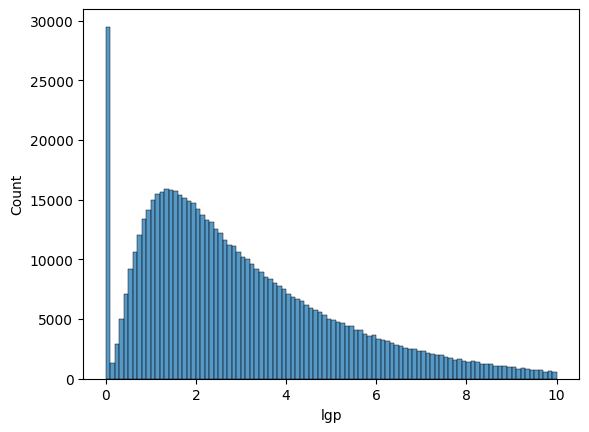

In [10]:
sns.histplot(data=dff, x='lgp', bins=np.linspace(0,10,101))
print('-log10 of P-value')

In [1]:
i=7

import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/mgander/Atlantic/notebooks/Kinobeads")
import fitter
from fitter import process_dfs

Path='/home/mgander/Atlantic/data/Viability/'
dff = pd.read_pickle(f'{Path}/dff_prism.pkl')

In [4]:
(~np.isfinite(dff)).sum()

-pec50            29213
slope                77
front                77
back                 77
fold_change      160458
auc               30973
rmse                 77
r2               653294
M1_noise          29213
p_err_0           29213
p_err_1           29213
p_err_2           29213
p_err_3              77
p_err_4              77
m0_rmse              77
m1_likelihood    653294
m0_likelihood    653294
f_statistic          77
p_value              77
dtype: int64

In [ ]:
i=7

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import csv
import pickle
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/mgander/Atlantic/notebooks/Kinobeads")
import fitter_exhaustive
from fitter_exhaustive import process_dfs
cols = ['-pec50', 'slope', 'front', 'back', 'fold_change', 'auc', 'rmse', 'r2', 'M1_noise', 'p_err_0', 'p_err_1', 'p_err_2', 'p_err_3', 
     'p_err_4', 'm0_rmse', 'm1_likelihood', 'm0_likelihood', 'f_statistic', 'p_value']

Path='/home/mgander/Atlantic/data/Viability/'

M = pd.read_pickle(f'{Path}/M_all_all.pkl')
sources = sorted(set(M['Source']))

df = M[M['Source']==sources[i]].copy()
df['log_dose']=np.log10(df['Dose'])

df['key'] = df['Cello']+'_'+df['PubChem_CID']
df['key'] = df['key'].astype('category')
df = df[df['key'].isin(list(dff[~np.isfinite(dff['-pec50'])].index))].copy()

keys=sorted(set(df['key']))

def do_batch(batch, k):
    pd.DataFrame({'k':[k]}).to_csv('tracker.csv')
    dfb = df[df['key'].isin(batch)].copy()
    dfb['key'] = list(dfb['key'])
    dfb['key'] = dfb['key'].astype('category')
    all_dfs = [group for _, group in dfb.groupby('key')]

    from joblib import Parallel, delayed
    from tqdm import tqdm
    
    # Initialize lists to store results
    lks = []
    ress = []
    
    # Define the number of jobs
    num_jobs = 28  # Set to -1 to use all available cores
    
    # Parallel processing
    results = Parallel(n_jobs=num_jobs)(delayed(process_dfs)(dfs) for dfs in all_dfs)
    
    # Process the results
    for key, res in results:
        lks.append(key)
        ress.append(res)
    return(lks, ress)


lks, ress = [], []

batchsize = 10**3

ks = int(np.ceil(len(keys) / batchsize))

for k in tqdm(range(ks)):
    batch = keys[k*batchsize:(k+1)*batchsize]
    a,b = do_batch(batch, k)
    lks.append(a)
    ress.append(b)
lks2=[a for b in lks for a in b]
ress2=[a for b in ress for a in b]

dff2=pd.DataFrame(data=np.array(ress2), index=lks2, columns=cols)

  0%|                                                                                                  | 0/30 [00:00<?, ?it/s]

In [6]:
(~np.isfinite(dff2)).sum()

-pec50            6299
slope               77
front               77
back                77
fold_change       8554
auc               8963
rmse                77
r2                  77
M1_noise          6299
p_err_0           6299
p_err_1           6299
p_err_2           6299
p_err_3             77
p_err_4             77
m0_rmse             77
m1_likelihood       77
m0_likelihood    29213
f_statistic         77
p_value             77
dtype: int64

In [7]:
dffnn =  dff[np.isfinite(dff['-pec50'])].copy()
dff666 = pd.concat([dffnn, dff2])
dff666.to_pickle(f'{Path}/dff_prism.pkl')